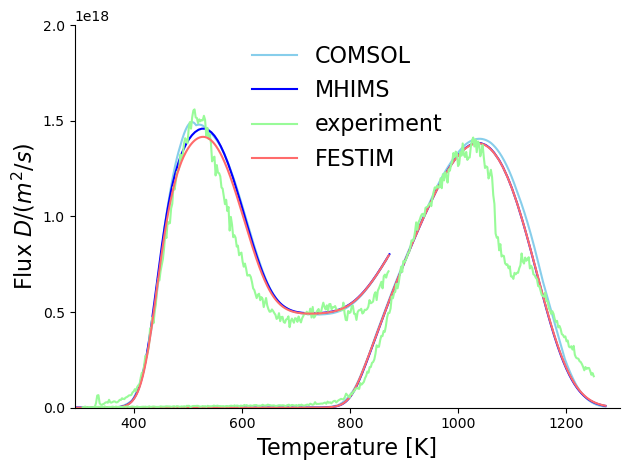

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
current_working_directory = os.getcwd()
if current_working_directory.endswith('Titans_TT_codecomparison'):
    os.chdir('graph_scripts_and_results/TDS_EUROFER')
# Load data from text files
COMSOL1 = np.loadtxt('TDS_Eurofer_Part1.txt')
COMSOL2 = np.loadtxt('TDS_Eurofer_Part2.txt')
festim = pd.read_csv('derived_quantities.csv')
pleasant_colors = ['#87CEEB', 'b', '#98FB98', '#FF6B6B']
# Plot the first dataset
plt.plot(COMSOL1[:,0], COMSOL1[:,1], color=pleasant_colors[0], label='COMSOL')

mhims = np.loadtxt('simTDS1.txt', delimiter=',')
mhims2 = np.loadtxt("simTDS2.txt", delimiter=',')
experiment1 = pd.read_csv("tds_mars21_873K.csv")
experiment2 = pd.read_csv("tds_mars21_1273K.csv")
festim = festim[festim['t(s)'] > 3600*13+1000]
festim1 = festim[(festim['t(s)'] < 3600*13+1000+580) ]
festim2=festim[(festim['t(s)'] > 3600*13+1000+600)]
# Plot the second dataset
plt.plot(mhims[:,0], mhims[:,1], color=pleasant_colors[1],label='MHIMS')
plt.plot(experiment1['T'], experiment1['flux'], color=pleasant_colors[2],label='experiment')
plt.plot(COMSOL2[:,0], COMSOL2[:,1], color=pleasant_colors[0])
plt.plot(mhims2[:,0], mhims2[:,1], color=pleasant_colors[1])
plt.plot(festim1['Average T volume 1'],-festim1['Flux surface 1: solute'],color=pleasant_colors[3], label='FESTIM')

plt.plot(festim2['Average T volume 1'],-festim2['Flux surface 1: solute'],color=pleasant_colors[3])
# Plot the third dataset
plt.plot(experiment2['T'], experiment2['flux'], color=pleasant_colors[2])

# Set labels and legend
plt.xlabel('Temperature [K]',size=16)
plt.ylabel(r'Flux $D/(m^2/s)$',size=16)
plt.legend(loc='upper center',fontsize=16, frameon=False)
plt.tight_layout()
# Set axis limits
plt.yticks(np.linspace(0, 2E18,5))
plt.xlim([290, 1300])
plt.ylim([0, 2E18])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Show the plot
plt.savefig('TDS_Eurofer.png',dpi=450)
